In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data',one_hot=True)


sess = tf.InteractiveSession()

Extracting E:\python\mnist_data\train-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\train-labels-idx1-ubyte.gz
Extracting E:\python\mnist_data\t10k-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\t10k-labels-idx1-ubyte.gz


第一种方法

In [4]:
#占位符未知的数据类型
#输入正确值,标签值(新的占位符)
#这里的None表示此张量的第一个维度可以是任何长度的
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder("float", [None,10])

In [5]:
W1 = tf.Variable(tf.zeros([784,500]))
b1 = tf.Variable(tf.zeros([500]))
#模型参数，可以用Variable表示
W2 = tf.Variable(tf.zeros([500,10]))
b2 = tf.Variable(tf.zeros([10]))
#模型参数，可以用Variable表示

In [6]:
a1 = tf.nn.softmax(tf.matmul(x,W1) + b1)
y = tf.nn.softmax(tf.matmul(a1,W2) + b2)
#用tf.matmul(​​X，W)表示x乘以W

In [7]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
#计算交叉熵
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
#梯度下降算法（gradient descent algorithm）以0.01的学习速率最小化交叉熵


In [8]:
#保存模型设置
saver = tf.train.Saver()

In [9]:
init = tf.global_variables_initializer()
#初始化我们创建的变量

In [10]:
#在训练之前，可以检查计算图 ，进行神经网络的可视化
# 在 在logs 目录 下 输入 一下
# tensorboard --logdir=./
#浏览器输入 
# localhost:6006
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("cnn/logs", sess.graph)
init = tf.global_variables_initializer()

In [11]:
#创建计算图
sess = tf.Session()
sess.run(init)
#在此时 ， 运行 sess可以检查 是否出错

In [12]:
#在Session里面启动模型，并且初始化变量

for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
saver.save(sess,'cnn/saver/moedl1.ckpt')
#让模型循环训练1000次

'cnn/saver/moedl1.ckpt'

In [13]:
 #让模型循环训练1000次
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#测试真实标签匹配

In [14]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print ("test accuracy %g"%sess.run(accuracy, feed_dict={x: mnist.test.images[:100], y_: mnist.test.labels[:100]}))


test accuracy 0.14


In [15]:
#神经网络训练完成，直接进行读取记录》
saver = tf.train.Saver()
sess = tf.InteractiveSession()
sess.run(init)
saver.restore(sess,'cnn/saver/moedl1.ckpt')

INFO:tensorflow:Restoring parameters from cnn/saver/moedl1.ckpt


In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print ("test accuracy %g"%sess.run(accuracy, feed_dict={x: mnist.test.images[:100], y_: mnist.test.labels[:100]}))

test accuracy 0.14


第二种 方法 使用cnn卷积神经网络

In [64]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data', one_hot=True)

import tensorflow as tf

Extracting E:\python\mnist_data\train-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\train-labels-idx1-ubyte.gz
Extracting E:\python\mnist_data\t10k-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\t10k-labels-idx1-ubyte.gz


In [65]:
# Parameters
learning_rate = 0.001
training_iters = 100
batch_size = 20
display_step = 2

In [66]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.8 # Dropout, probability to keep units

In [67]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)


In [68]:
# Create custom model
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)


In [69]:
def customnet(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    pool1 = max_pool('pool1', conv1, k=2)
    # Apply Normalization
    norm1 = norm('norm1', pool1, lsize=4)
    # Apply Dropout
    norm1 = tf.nn.dropout(norm1, _dropout)

    # Convolution Layer
    conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    pool2 = max_pool('pool2', conv2, k=2)
    # Apply Normalization
    norm2 = norm('norm2', pool2, lsize=4)
    # Apply Dropout
    norm2 = tf.nn.dropout(norm2, _dropout)

    # Convolution Layer
    conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
    # Max Pooling (down-sampling)
    pool3 = max_pool('pool3', conv3, k=2)
    # Apply Normalization
    norm3 = norm('norm3', pool3, lsize=4)
    # Apply Dropout
    norm3 = tf.nn.dropout(norm3, _dropout)
    #conv4
    conv4 = conv2d('conv4', norm3, _weights['wc4'], _biases['bc4'])
    # Max Pooling (down-sampling)
    pool4 = max_pool('pool4', conv4, k=2)
    # Apply Normalization
    norm4 = norm('norm4', pool4, lsize=4)
    # Apply Dropout
    norm4 = tf.nn.dropout(norm4, _dropout)
    # Fully connected layer
    dense1 = tf.reshape(norm4, [-1, _weights['wd1'].get_shape().as_list()[0]]) # Reshape conv3 output to fit dense layer input
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') # Relu activation

    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

    # Output, class prediction
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out


In [70]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64])),
    'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256])),
    'wc4': tf.Variable(tf.random_normal([2, 2, 256, 512])),
    'wd1': tf.Variable(tf.random_normal([2*2*512, 1024])), 
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([128])),
    'bc3': tf.Variable(tf.random_normal([256])),
    'bc4': tf.Variable(tf.random_normal([512])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [71]:
# Construct model
pred = customnet(x, weights, biases, keep_prob)


In [72]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [73]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [74]:
# Initializing the variables
init = tf.initialize_all_variables()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [76]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Keep training until reach max iterations
    for step in range(1,100):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % 10 == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
            
    print ("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], y: mnist.test.labels[:256], keep_prob: 1.}))


Iter 200, Minibatch Loss= 292181.218750, Training Accuracy= 0.15000
Iter 400, Minibatch Loss= 97581.484375, Training Accuracy= 0.25000
Iter 600, Minibatch Loss= 206365.140625, Training Accuracy= 0.10000
Iter 800, Minibatch Loss= 117109.265625, Training Accuracy= 0.10000
Iter 1000, Minibatch Loss= 113146.765625, Training Accuracy= 0.15000
Iter 1200, Minibatch Loss= 90711.625000, Training Accuracy= 0.10000
Iter 1400, Minibatch Loss= 107905.976562, Training Accuracy= 0.25000
Iter 1600, Minibatch Loss= 88965.390625, Training Accuracy= 0.10000
Iter 1800, Minibatch Loss= 72404.687500, Training Accuracy= 0.35000
Optimization Finished!
Testing Accuracy: 0.1796875


#第三种方法  inception_net 网络

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data', one_hot=True)

import tensorflow as tf

D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting E:\python\mnist_data\train-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\train-labels-idx1-ubyte.gz
Extracting E:\python\mnist_data\t10k-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\t10k-labels-idx1-ubyte.gz


In [2]:
# Parameters
learning_rate = 0.001
training_iters = 100
batch_size = 20
display_step = 2

In [3]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.8 # Dropout, probability to keep units

In [4]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)


In [5]:
# Create custom model
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)


In [51]:
# Store layers weight & bias
weights = {
    'wa1': tf.Variable(tf.random_normal([1, 1, 1, 16])),
    'wa3': tf.Variable(tf.random_normal([3, 3, 1, 16])),
    'wa5': tf.Variable(tf.random_normal([5, 5, 1, 16])),
    'wb1': tf.Variable(tf.random_normal([1, 1, 48, 64])),
    'wb3': tf.Variable(tf.random_normal([3, 3, 48, 64])),
    'wb5': tf.Variable(tf.random_normal([5, 5, 48, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*192, 2048])), 
    'wd2': tf.Variable(tf.random_normal([2048, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'ba1': tf.Variable(tf.random_normal([16])),
    'ba3': tf.Variable(tf.random_normal([16])),
    'ba5': tf.Variable(tf.random_normal([16])),
    'bb1': tf.Variable(tf.random_normal([64])),
    'bb3': tf.Variable(tf.random_normal([64])),
    'bb5': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([2048])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [52]:
def inception_block_a(_X,_weights,_biases,_dropout):
    
    conv1 = conv2d('conv_a1', _X, _weights['wa1'], _biases['ba1'])
    pool1 = max_pool('pool_a1', conv1, k=2)
    norm1 = norm('norm1_a1', pool1, lsize=4)
    norm1 = tf.nn.dropout(norm1, _dropout)
    
    conv3 = conv2d('conv_a3', _X, _weights['wa3'], _biases['ba3'])
    pool3 = max_pool('pool_a3', conv3, k=2)
    norm3 = norm('norm1_a3', pool3, lsize=4)
    norm3 = tf.nn.dropout(norm3, _dropout)
    
    conv5 = conv2d('conv_a5', _X, _weights['wa5'], _biases['ba5'])
    pool5 = max_pool('pool_a5', conv5, k=2)
    norm5 = norm('norm1_a5', pool5, lsize=4)
    norm5 = tf.nn.dropout(norm5, _dropout)
    
    inception = tf.concat([norm1,norm3,norm5],3)
    return inception

In [53]:
def inception_block_b(_X,_weights,_biases,_dropout):
    
    conv1 = conv2d('conv_b1', _X, _weights['wb1'], _biases['bb1'])
    pool1 = max_pool('pool_b1', conv1, k=2)
    norm1 = norm('norm1_b1', pool1, lsize=4)
    norm1 = tf.nn.dropout(norm1, _dropout)
    
    conv3 = conv2d('conv_b3', _X, _weights['wb3'], _biases['bb3'])
    pool3 = max_pool('pool_b3', conv3, k=2)
    norm3 = norm('norm1_b3', pool3, lsize=4)
    norm3 = tf.nn.dropout(norm3, _dropout)
    
    conv5 = conv2d('conv_b5', _X, _weights['wb5'], _biases['bb5'])
    pool5 = max_pool('pool_b5', conv5, k=2)
    norm5 = norm('norm1_b5', pool5, lsize=4)
    norm5 = tf.nn.dropout(norm5, _dropout)
    
    inception = tf.concat([norm1,norm3,norm5],3)
    return inception

In [57]:
def customnet(_X, _weights, _biases, _dropout):
    _X = tf.reshape(x, shape=[-1, 28, 28, 1])

    a1 = inception_block_a(_X , weights,biases, _dropout)
    
    b = inception_block_b( a1 ,weights,biases, _dropout)
    
    dense1 = tf.reshape(b, [-1, _weights['wd1'].get_shape().as_list()[0]]) # Reshape conv3 output to fit dense layer input
    
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') # Relu activation

    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

    # Output, class prediction
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out

In [59]:
pred = customnet(x, weights, biases, keep_prob)
pred.shape

TensorShape([Dimension(None), Dimension(10)])

In [60]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [61]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [62]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [63]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Keep training until reach max iterations
    for step in range(1,100):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % 10 == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
            
    print ("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], y: mnist.test.labels[:256], keep_prob: 1.}))


Iter 200, Minibatch Loss= 503426.406250, Training Accuracy= 0.10000
Iter 400, Minibatch Loss= 245885.500000, Training Accuracy= 0.25000
Iter 600, Minibatch Loss= 79074.640625, Training Accuracy= 0.45000
Iter 800, Minibatch Loss= 135851.984375, Training Accuracy= 0.60000
Iter 1000, Minibatch Loss= 60433.335938, Training Accuracy= 0.70000
Iter 1200, Minibatch Loss= 51373.078125, Training Accuracy= 0.75000
Iter 1400, Minibatch Loss= 118952.625000, Training Accuracy= 0.55000
Iter 1600, Minibatch Loss= 55398.187500, Training Accuracy= 0.70000
Iter 1800, Minibatch Loss= 24187.839844, Training Accuracy= 0.85000
Optimization Finished!
Testing Accuracy: 0.7265625


#第四种方法 res_net 网络

In [39]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data', one_hot=True)
import tensorflow as tf
import numpy as np

Extracting E:\python\mnist_data\train-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\train-labels-idx1-ubyte.gz
Extracting E:\python\mnist_data\t10k-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\t10k-labels-idx1-ubyte.gz


In [2]:
# Parameters
learning_rate = 0.001
training_iters = 100
batch_size = 20
display_step = 2

In [3]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.8 # Dropout, probability to keep units

In [4]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [42]:
# Create custom model
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)


In [52]:
# Store layers weight & bias
weights = {
    'wa': tf.Variable(tf.random_normal([3, 3, 1, 32])),
    'wa1': tf.Variable(tf.random_normal([3, 3, 1, 32])),
    'wa2': tf.Variable(tf.random_normal([3, 3, 32, 32])),
    'wb': tf.Variable(tf.random_normal([3, 3, 32, 64])),
    'wb1': tf.Variable(tf.random_normal([3, 3, 32, 64])),
    'wb2': tf.Variable(tf.random_normal([3, 3, 64, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])), 
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'ba': tf.Variable(tf.random_normal([32])),
    'ba1': tf.Variable(tf.random_normal([32])),
    'ba2': tf.Variable(tf.random_normal([32])),
    'bb': tf.Variable(tf.random_normal([64])),
    'bb1': tf.Variable(tf.random_normal([64])),
    'bb2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [53]:
def identity_block(_X, _weights , block, _biases,_dropout):
    
    x_shortcut = _X
    
    x_shortcut = tf.nn.bias_add(tf.nn.conv2d(x_shortcut, _weights['w'+block], strides=[1, 2, 2, 1], padding='SAME'),_biases['b'+block])
    
    conv1 = conv2d('conv_'+block+'1', _X, _weights['w'+block+'1'], _biases['b'+block+'1'])
    pool1 = max_pool('pool_'+block+'1', conv1, k=2)
    norm1 = norm('norm1_'+block+'1', pool1, lsize=1)
    norm1 = tf.nn.dropout(norm1, _dropout)
    
    norm1 = tf.nn.bias_add(tf.nn.conv2d(norm1, _weights['w'+block+'2'], strides=[1, 1, 1, 1], padding='SAME'),_biases['b'+block+'2'])

    norm2 = tf.add(x_shortcut ,  norm1 )
    
    norm2  = tf.nn.relu(norm2 ,  name='identity_block'+block)
    
    return norm2 

In [58]:
def customnet(_X, _weights, _biases, _dropout):
    _X = tf.reshape(x, shape=[-1, 28, 28, 1])

    a  = identity_block(_X, _weights , 'a', _biases, _dropout)
    
    b  = identity_block(a, _weights , 'b', _biases, _dropout)
    
    dense1 = tf.reshape(b, [-1, _weights['wd1'].get_shape().as_list()[0]]) # Reshape conv3 output to fit dense layer input
    
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') # Relu activation

    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

    # Output, class prediction
    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out

In [60]:
pred = customnet(x, weights, biases, keep_prob)
pred.shape

TensorShape([Dimension(None), Dimension(10)])

In [61]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [62]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [63]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [64]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Keep training until reach max iterations
    for step in range(1,100):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % 10 == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
            
    print ("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], y: mnist.test.labels[:256], keep_prob: 1.}))


Iter 200, Minibatch Loss= 8092278.500000, Training Accuracy= 0.15000
Iter 400, Minibatch Loss= 6487982.500000, Training Accuracy= 0.10000
Iter 600, Minibatch Loss= 2653633.250000, Training Accuracy= 0.40000
Iter 800, Minibatch Loss= 3063494.000000, Training Accuracy= 0.40000
Iter 1000, Minibatch Loss= 3200554.500000, Training Accuracy= 0.35000
Iter 1200, Minibatch Loss= 3253205.500000, Training Accuracy= 0.40000
Iter 1400, Minibatch Loss= 2544643.750000, Training Accuracy= 0.55000
Iter 1600, Minibatch Loss= 2072073.375000, Training Accuracy= 0.55000
Iter 1800, Minibatch Loss= 2728199.500000, Training Accuracy= 0.50000
Optimization Finished!
Testing Accuracy: 0.5859375


第五种方法 卷积自动编码机

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data', one_hot=True)

import tensorflow as tf

In [ ]:
# Parameters
learning_rate = 0.001
training_iters = 100
batch_size = 20
display_step = 2

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.8 # Dropout, probability to keep units

In [ ]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [ ]:
# Create custom model
def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1], padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)

def deconv2d(name, l_input, w, b,output_shape):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d_transpose(l_input,w,output_shape=output_shape,strides=[1,2,2,1],padding="SAME"),b), name=name)


In [ ]:
# Store layers weight & bias
weights = {
    'wa1': tf.Variable(tf.random_normal([3, 3, 1, 32])),
    'wa2': tf.Variable(tf.random_normal([3, 3, 32, 64])),
    'wa3': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wb1': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wb2': tf.Variable(tf.random_normal([3, 3,32, 64])),
    'wb3': tf.Variable(tf.random_normal([3, 3, 1, 32])),

}
biases = {
    'ba1': tf.Variable(tf.random_normal([32])),
    'ba2': tf.Variable(tf.random_normal([64])),
    'ba3': tf.Variable(tf.random_normal([128])),
    'bb1': tf.Variable(tf.random_normal([64])),
    'bb2': tf.Variable(tf.random_normal([32])),
    'bb3': tf.Variable(tf.random_normal([1])),

}

In [ ]:
def encoder(_X, _weights, _biases,_dropout):
    
    conv1 = conv2d('conv_a1', _X, _weights['wa1'], _biases['ba1'])
    pool1 = max_pool('pool_a1', conv1, k=2)
    norm1 = norm('norm1_a1', pool1, lsize=4)
    norm1 = tf.nn.dropout(norm1, _dropout)
    
    conv2 = conv2d('conv_a1', norm1, _weights['wa2'], _biases['ba2'])
    pool2 = max_pool('pool_a2', conv2, k=2)
    norm2 = norm('norm1_a2', pool2, lsize=4)
    norm2 = tf.nn.dropout(norm2, _dropout)
    
    conv3 = conv2d('conv_a3', norm2, _weights['wa3'], _biases['ba3'])
    pool3 = max_pool('pool_a3', conv3, k=2)
    norm3 = norm('norm1_a3', pool3, lsize=4)
    norm3 = tf.nn.dropout(norm3, _dropout)
    
    return norm3

In [ ]:
def decoder(_X, _weights, _biases,_dropout):
    
    conv1 = deconv2d('deconv_b1',_X, _weights['wb1'], _biases['bb1'],[batch_size,7,7,64])
    norm1 = norm('norm1_b1', conv1, lsize=4)
    norm1 = tf.nn.dropout(norm1, _dropout)
    
    conv2 = deconv2d('deconv_b2',norm1, _weights['wb2'], _biases['bb2'],[batch_size,14,14,32])
    norm2 = norm('norm1_b2', conv2, lsize=4)
    norm2 = tf.nn.dropout(norm2, _dropout)
    
    conv3 = deconv2d('deconv_b3',norm2, _weights['wb3'],  _biases['bb3'],[batch_size,28,28,1])
    norm3 = norm('norm1_b3', conv3, lsize=4)
    norm3 = tf.nn.dropout(norm3, _dropout)
    
    return norm3

In [ ]:
def customnet(_X, _weights, _biases, _dropout):
    
    dense1 = tf.reshape(_X , [-1, _weights['wd1'].get_shape().as_list()[0]]) # Reshape conv3 output to fit dense layer input
    
    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') # Relu activation

    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

    # Output, class prediction
    out = tf.matmul(dense2, weights['out']) + biases['out']
    
    return out 

In [ ]:
_X = tf.reshape(x, shape=[-1, 28, 28, 1])
en_data =encoder(_X, weights, biases,dropout)
de_data = decoder(en_data, weights, biases,dropout)

In [ ]:
# Define loss and optimizer
de_data = tf.reshape(de_data,[-1, n_input])
en_loss = tf.reduce_mean(tf.pow(tf.subtract(de_data, x), 2.0)) 
en_optimizer = tf.train.AdamOptimizer(0.01).minimize(en_loss) 

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [58]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Keep training until reach max iterations
    for step in range(1,100):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(en_optimizer, feed_dict={x: batch_xs, keep_prob: dropout})
        if step % 10 == 0:
              # Calculate batch loss
            loss = sess.run(en_loss, feed_dict={x: batch_xs, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss))
    saver.save(sess,'saver/CAE_moedl.ckpt')
    print ("Optimization Finished!")

Iter 200, Minibatch Loss= 312.750580
Iter 400, Minibatch Loss= 27.594934
Iter 600, Minibatch Loss= 4.931098
Iter 800, Minibatch Loss= 2.536595
Iter 1000, Minibatch Loss= 1.661268
Iter 1200, Minibatch Loss= 0.927785
Iter 1400, Minibatch Loss= 0.938704
Iter 1600, Minibatch Loss= 0.559970
Iter 1800, Minibatch Loss= 0.401739
Optimization Finished!


In [59]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape((28,28)),interpolation='nearest',cmap='binary')
    plt.show()

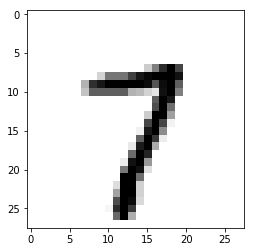

INFO:tensorflow:Restoring parameters from saver/CAE_moedl.ckpt


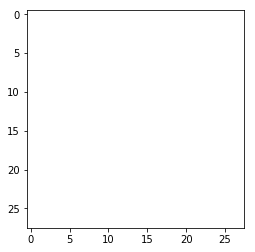

In [60]:
reimg = mnist.train.images[0].reshape(28,28)
plot_image(reimg)

with tf.Session() as sess:
    saver.restore(sess,'saver/CAE_moedl.ckpt')
    img = sess.run(de_data,feed_dict={x:mnist.train.images[0:20], keep_prob: 1.})
    reimg = img[0].reshape(28,28)
    plot_image(reimg)

In [ ]:
import numpy as np
with tf.Session() as sess:
    saver.restore(sess,'saver/CAE_moedl.ckpt')
    for  i in range(2570):
        en_data_ = sess.run(en_data,feed_dict={x:mnist.train.images[i*batch_size:(i+1)*batch_size], keep_prob: 1.})
        en_data_ = tf.reshape(en_data_ , [batch_size, 4*4*128])
        if i == 0:
            data = np.array(en_data_)
        else:
            data = np.vstack([data,en_data_])
data.shape

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
# Store layers weight & bias
weights = {
    'wd1': tf.Variable(tf.random_normal([4*4*128, 1024])), 
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 2048])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [ ]:
pred = customnet(_X, _weights, _biases, _dropout)

In [ ]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Keep training until reach max iterations
    for step in range(1,100):
        minibatches = random_mini_batches(data, mnist.train.labels, minibatch_size = 20, 1)
        for minibatch in minibatches:
            (batch_xs, batch_ys) = minibatch
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % 10 == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
    saver.save(sess,'saver/CAE_class_moedl.ckpt')      
    print ("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256], y: mnist.test.labels[:256], keep_prob: 1.}))


LSTM网络

In [1]:
import tensorflow as tf
import numpy as np

D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from  tensorflow.examples.tutorials.mnist import  input_data
mnist = input_data.read_data_sets(r'E:\python\mnist_data', one_hot=True)


Extracting E:\python\mnist_data\train-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\train-labels-idx1-ubyte.gz
Extracting E:\python\mnist_data\t10k-images-idx3-ubyte.gz
Extracting E:\python\mnist_data\t10k-labels-idx1-ubyte.gz


In [9]:
# hyperparameters
lr = 0.001                  # learning rate
training_iters = 10000     # train step 上限
batch_size = 128            
n_inputs = 28               # MNIST data input (img shape: 28*28)
n_steps = 28                # time steps
n_hidden_units = 128        # neurons in hidden layer
n_classes = 10              # MNIST classes (0-9 digits)

In [4]:
# x y placeholder
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

# 对 weights biases 初始值的定义
weights = {
    # shape (28, 128)
    'w_in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # shape (128, 10)
    'w_out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}
biases = {
    # shape (128, )
    'b_in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # shape (10, )
    'b_out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}

In [12]:
def RNN(X, weights, biases):
    # 原始的 X 是 3 维数据, 我们需要把它变成 2 维数据才能使用 weights 的矩阵乘法
    # X ==> (128 batches * 28 steps, 28 inputs)
    X = tf.reshape(X, [-1, n_inputs])

    # X_in = W*X + b
    X_in = tf.matmul(X, weights['w_in']) + biases['b_in']
    # X_in ==> (128 batches, 28 steps, 128 hidden) 换回3维
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])
    
    # 使用 basic LSTM Cell.
    lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden_units, forget_bias=1.0, state_is_tuple=True)
    init_state = lstm_cell.zero_state(batch_size, dtype=tf.float32) # 初始化全零 state
    
    outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X_in, initial_state=init_state, time_major=False)
    #results = tf.matmul(final_state[1],weights['w_out']) + biases['b_out']
    # 把 outputs 变成 列表 [(batch, outputs)..] * steps
    outputs = tf.unstack(tf.transpose(outputs, [1,0,2]))
    results = tf.matmul(outputs[-1], weights['out']) + biases['out']    #选取最后一个 output
    return results

In [6]:
pred  = RNN(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
train_op = tf.train.AdamOptimizer(lr).minimize(cost)




In [7]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
init  = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape([batch_size, n_steps, n_inputs])
        sess.run([train_op], feed_dict={
            x: batch_xs,
            y: batch_ys,
        })
        if step % 50 == 0:
            print(sess.run(accuracy, feed_dict={
            x: batch_xs,
            y: batch_ys,
        }))
        step += 1

0.109375
0.796875
